# Лабораторная работа № 1: Исследование набора данных

## Описание датасета

**Предметная область:**
Датасет представляет собой "Global AI Index" и включает индикаторы, влияющие на индекс по 62 странам. Индекс оценивает уровень инвестиций, инноваций и внедрения искусственного интеллекта (ИИ) в странах.

**Источник данных:**
Данные собраны и предоставлены Tortoise Media и использовались в исследовании "Artificial Intelligence on the World Stage: Dominant Players and Aspiring Challengers".

**Характер данных:**
Данные являются реальными и получены на основе анализа и обработки 143 индикаторов, отражающих текущее состояние ИИ в разных странах.

**Атрибуты датасета:**
- **Country (Страна)**: Категориальный (строковый). Название страны.
- **Talent (Таланты)**: Числовой. Оценка доступности квалифицированных специалистов.
- **Infrastructure (Инфраструктура)**: Числовой. Оценка инфраструктуры (электричество, интернет и т.д.).
- **Operating Environment (Операционная среда)**: Числовой. Оценка регулирующего контекста и общественного мнения.
- **Research (Исследования)**: Числовой. Оценка уровня исследований в области ИИ.
- **Development (Разработка)**: Числовой. Оценка разработки платформ и алгоритмов.
- **Government Strategy (Государственная стратегия)**: Числовой. Оценка вовлеченности правительства.
- **Commercial (Коммерческая активность)**: Числовой. Оценка стартапов и бизнес-инициатив.
- **Total score (Общий индекс)**: Числовой. Оценка общего уровня развития ИИ.
- **Region (Регион)**: Категориальный (строковый). Географический регион.
- **Cluster (Кластер)**: Категориальный (строковый). Кластер на основе характеристик ИИ.
- **Income group (Группа доходов)**: Категориальный (строковый). Группа стран по доходам.
- **Political regime (Политический режим)**: Категориальный (строковый). Тип политического режима.

## Описание задачи анализа
Задача состоит в исследовании и анализе данных для выявления ключевых взаимосвязей и подготовки данных для последующего применения алгоритмов кластеризации и классификации.

## Анализ данных
### 1. Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('AI_index_db.csv')

### 2. Предварительный анализ данных

In [2]:
print(data.head())
print(data.info())

                    Country  Talent  Infrastructure  Operating Environment  \
0  United States of America  100.00           94.02                  64.56   
1                     China   16.51          100.00                  91.57   
2            United Kingdom   39.65           71.43                  74.65   
3                    Canada   31.28           77.05                  93.94   
4                    Israel   35.76           67.58                  82.44   

   Research  Development  Government Strategy  Commercial  Total score  \
0    100.00       100.00                77.39      100.00       100.00   
1     71.42        79.97                94.87       44.02        62.92   
2     36.50        25.03                82.82       18.91        40.93   
3     30.67        25.78               100.00       14.88        40.19   
4     32.63        27.96                43.91       27.33        39.89   

         Region                Cluster  Income group   Political regime  
0      Ameri

### Результаты: 
* Все столбцы содержат полные данные без пропусков. 
* Числовые атрибуты имеют тип float64, а категориальные — строковый тип.

### 3. Пропущенные значения

In [3]:
missing_values = data.isnull().sum()
print("Пропущенные значения:\n", missing_values)

Пропущенные значения:
 Country                  0
Talent                   0
Infrastructure           0
Operating Environment    0
Research                 0
Development              0
Government Strategy      0
Commercial               0
Total score              0
Region                   0
Cluster                  0
Income group             0
Political regime         0
dtype: int64


### Результаты: 
* Пропущенных значений нет.

### 4. Статистическое описание числовых атрибутов

In [4]:
description = data.describe()
print("Статистическое описание данных:\n", description)

mean_std = data[['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score']].agg(['mean', 'std'])
print("\n\nСреднее значение и стандартное отклонение:\n", mean_std)

Статистическое описание данных:
            Talent  Infrastructure  Operating Environment    Research  \
count   62.000000       62.000000              62.000000   62.000000   
mean    16.803065       63.503710              66.925484   16.610000   
std     15.214963       20.217525              20.000424   17.413996   
min      0.000000        0.000000               0.000000    0.000000   
25%      7.365000       55.857500              58.107500    3.032500   
50%     13.445000       65.230000              69.505000   12.930000   
75%     24.567500       75.947500              80.500000   25.412500   
max    100.000000      100.000000             100.000000  100.000000   

       Development  Government Strategy  Commercial  Total score  
count    62.000000            62.000000   62.000000    62.000000  
mean     14.824677            57.865645    6.171935    23.914677  
std      19.419279            26.252448   14.029632    15.123586  
min       0.000000             0.000000    0.00000

### Результаты: 
1. ***Talent***:
* Большое стандартное отклонение говорит о значительном разбросе значений — от стран с низким уровнем развития талантов до стран-лидеров.

2. ***Infrastructure***:
* Большинство стран имеют инфраструктуру выше среднего уровня (50%), что подтверждается медианой 65.23. Однако присутствует заметный разброс значений, что указывает на значительные различия между странами.

3. ***Operating Environment***:
* В этом атрибуте наблюдается более равномерное распределение, так как большинство стран имеют хорошие условия для работы с ИИ.

4. ***Research***:
* Высокое стандартное отклонение и медианное значение 12.93 указывают на то, что большая часть стран не ведет активные исследования в области ИИ, однако есть несколько стран, которые значительно выделяются по этому показателю.

5. ***Development***:
* Показатели разработки существенно варьируются: в большинстве стран разработка ИИ незначительна, но есть несколько стран с высокими показателями, что приводит к большому стандартному отклонению.

6. ***Government Strategy***:
* Стратегии стран в области ИИ значительно отличаются, что видно по высокому разбросу значений. Многие страны демонстрируют высокий уровень вовлеченности правительства в развитие ИИ.

7. ***Commercial***:
* Коммерческая активность в сфере ИИ находится на низком уровне для большинства стран (медиана — 2.59), что также подтверждается низким средним значением.

8. ***Total Score***:
* Несмотря на наличие стран-лидеров по общему баллу, большинство стран находятся в диапазоне 0–30, что свидетельствует о низком уровне общего развития ИИ в большинстве стран.

### 5. Построение гистограмм распределения значений

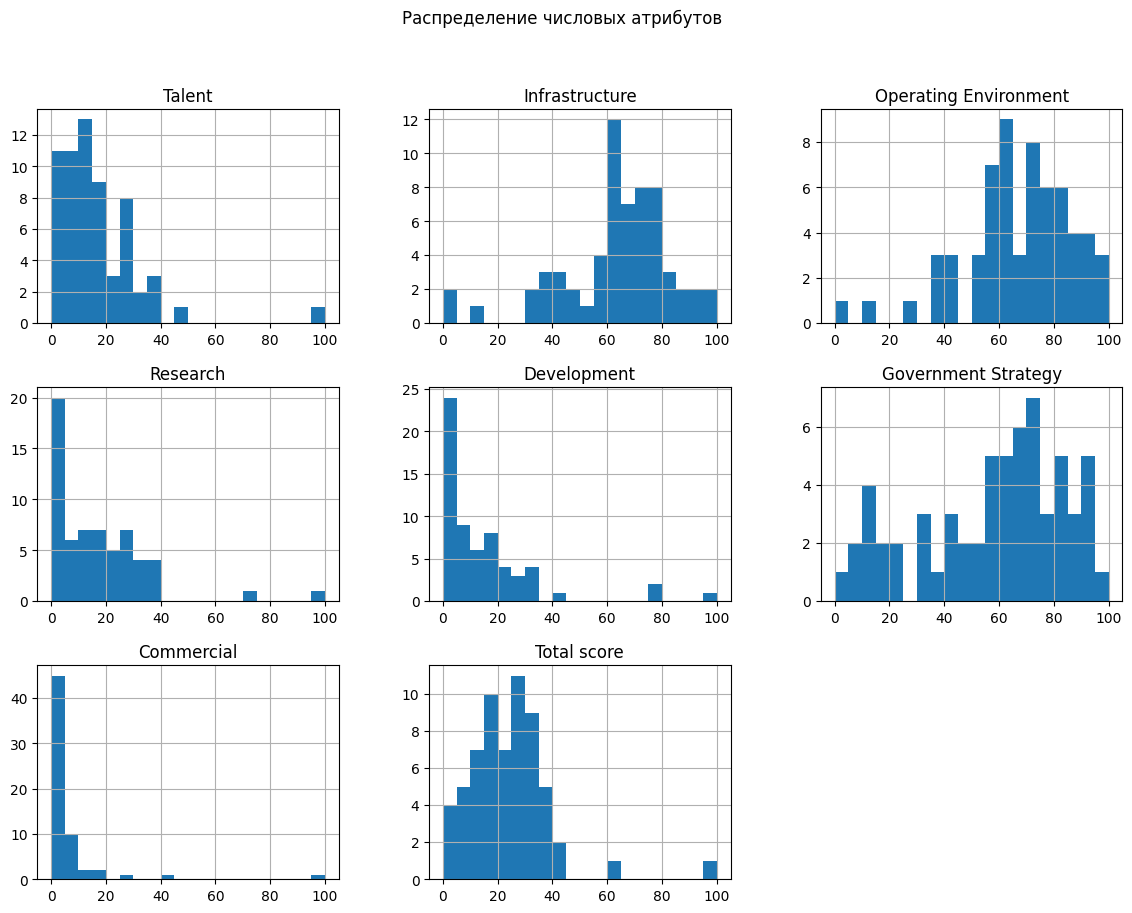

In [5]:
data[['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score']].hist(figsize=(14, 10), bins=20)
plt.suptitle('Распределение числовых атрибутов')
plt.show()

### Результаты: 
1. ***Talent***:
* Распределение смещено влево, большая часть значений находится в диапазоне от 0 до 20.
* Присутствуют выбросы с высокими значениями, вплоть до 100.

2. ***Infrastructure***:
* Значения распределены неравномерно, с несколькими пиками, что может указывать на наличие различных групп стран с разной степенью развития инфраструктуры.
* Встречаются страны с низкими показателями (ближе к 0), но есть несколько стран с высокими значениями до 100.

3. ***Operating Environment***:
* Значения распределены более равномерно, с пиками в диапазоне от 50 до 80, что указывает на более стабильную операционную среду в большинстве стран.
* Меньшая часть стран имеет показатели ниже 20.

4. ***Research***:
* Распределение сильно смещено влево. Большая часть стран имеет низкие значения, что указывает на слабое развитие исследований в области ИИ.
* Присутствуют несколько стран с высокими показателями (выбросы), что может означать наличие лидеров в этой области.

5. ***Development***:
* Аналогично показателю "Research", большинство стран имеет низкие показатели разработки ИИ, с несколькими выбросами, что также указывает на наличие лидеров.

6. ***Government Strategy***:
* Большая часть стран имеет значения в диапазоне от 50 до 90, что указывает на высокий уровень вовлеченности правительств в стратегии по развитию ИИ.
* Присутствуют страны с низкими показателями.

7. ***Commercial***:
* Показатель сильно смещен влево, большинство стран имеют значения около 0, что может указывать на слабую активность стартапов и бизнесов в области ИИ.
* Небольшое количество стран демонстрирует высокие показатели.

8. ***Total Score***:
* Распределение индекса более равномерное, с пиком в диапазоне от 40 до 70, что свидетельствует о среднем уровне развития ИИ в большинстве стран.
* Присутствуют несколько стран с высокими значениями.

### 6. Анализ выбросов

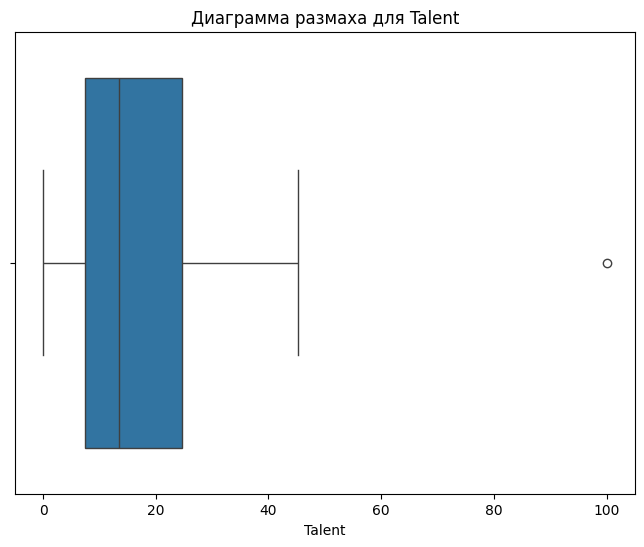

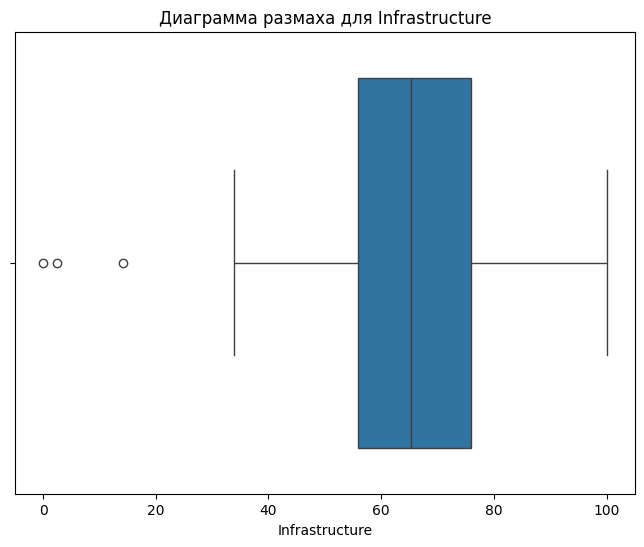

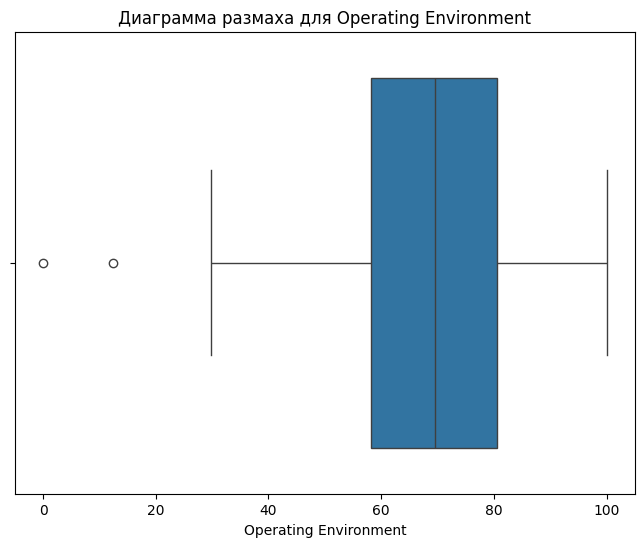

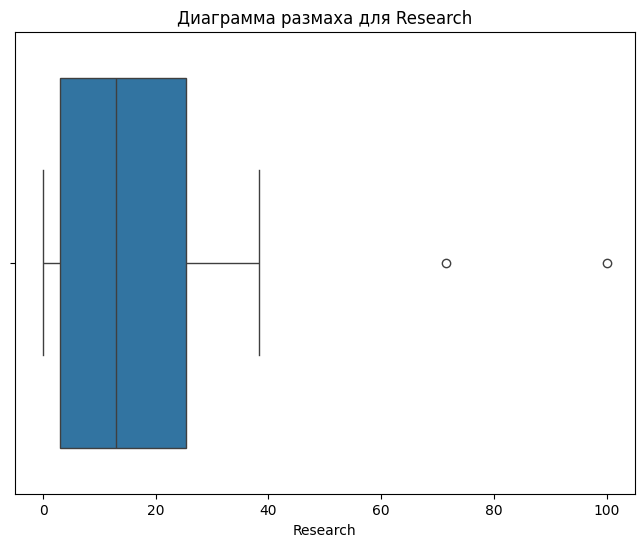

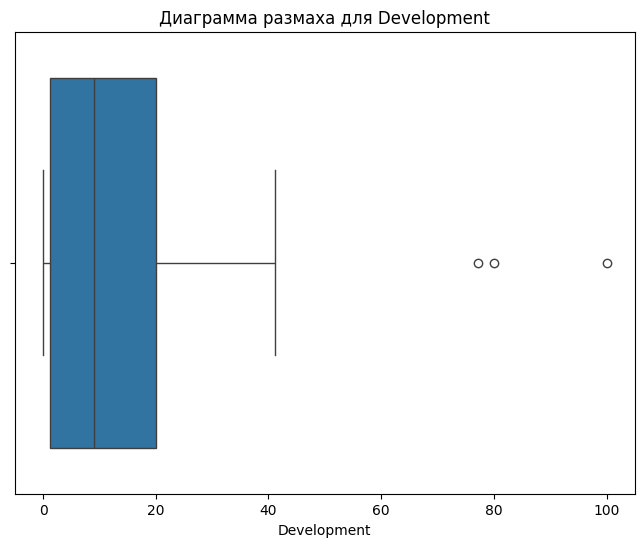

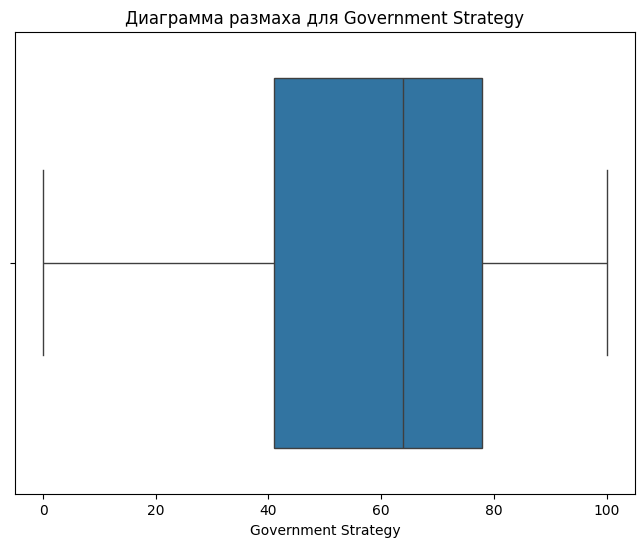

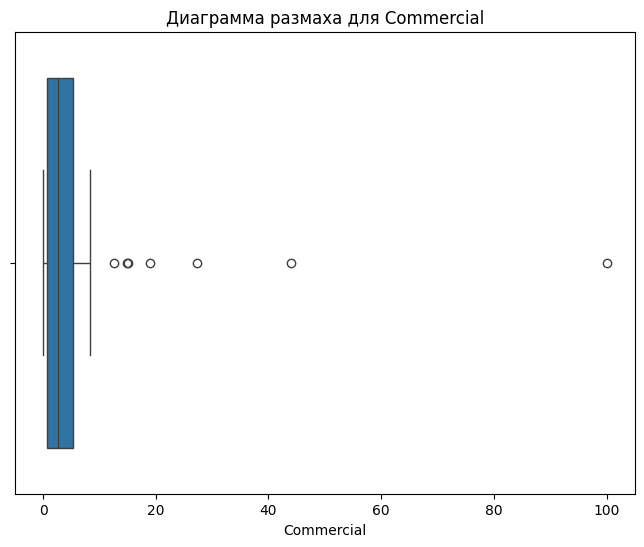

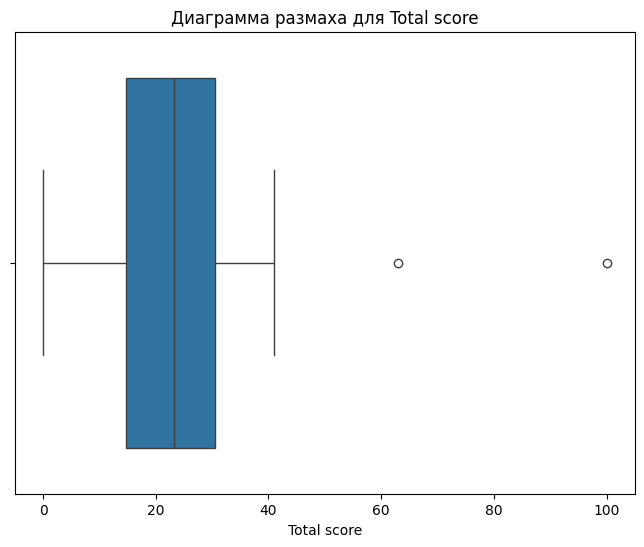

In [18]:
# Построение диаграмм размаха для выявления выбросов
for column in ['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Диаграмма размаха для {column}')
    plt.show()

### Результаты: 
1. ***Talent***:
* Большинство значений распределены в диапазоне от 0 до 25.
* Присутствуют выбросы, в частности одно значение, которое сильно превышает остальные и приближается к 100. Это может указывать на страну-лидера по показателю "Таланты", что требует дальнейшего анализа.

2. ***Infrastructure***:
* Основное распределение значений находится в диапазоне от 40 до 80.
* Есть несколько выбросов ближе к 0, что указывает на наличие стран с очень низкими показателями инфраструктуры. Эти выбросы могут сильно влиять на анализ, особенно если рассматривать средние значения.

3. ***Operating Environment***:
* Большинство значений расположены в диапазоне от 50 до 80, что говорит о стабильности операционной среды в большинстве стран.
* Присутствуют несколько незначительных выбросов с низкими значениями, что может указывать на менее стабильные операционные условия в некоторых странах.

4. ***Research***:
* Основная масса значений сосредоточена в диапазоне до 20.
* Наблюдаются несколько выбросов выше 80, что указывает на страны, которые значительно превосходят других по уровню исследований в области искусственного интеллекта.

5. ***Development***:
* Большинство значений распределены в диапазоне от 0 до 25, что указывает на то, что в большинстве стран уровень разработки искусственного интеллекта остается на низком уровне.
* Присутствуют два значительных выброса, где значения приближаются к 100. Это может указывать на несколько стран-лидеров, которые активно развивают ИИ, в то время как остальные страны сильно отстают.

6. ***Government Strategy***:
* Основное распределение значений находится в диапазоне от 50 до 80, что свидетельствует о высоком уровне вовлеченности правительств в разработку стратегий по искусственному интеллекту.
* Однако, как и в других атрибутах, присутствуют страны с низкими показателями (выбросы около 0), что указывает на недостаток стратегии ИИ в некоторых странах или отсутствие целевых программ на национальном уровне.

7. ***Commercial***:
* Большинство значений сосредоточено в диапазоне от 0 до 5, что показывает слабую коммерческую активность в области ИИ в большинстве стран.
* Присутствуют значительные выбросы, что указывает на наличие стран с высокой активностью стартапов и бизнес-инициатив в сфере ИИ. Вероятно, это страны с высокоразвитыми экономиками и поддержкой предпринимательства в ИТ-секторе.

8. ***Total Score***:
* Основное распределение значений находится в диапазоне от 10 до 35, что говорит о меньшем уровне развития ИИ в большинстве стран.
* Присутствуют несколько стран с высокими показателями, что указывает на их значительное превосходство в области ИИ по сравнению с остальными странами. Эти выбросы подчеркивают наличие глобальных лидеров в развитии ИИ.

### 7. Корреляция между атрибутами

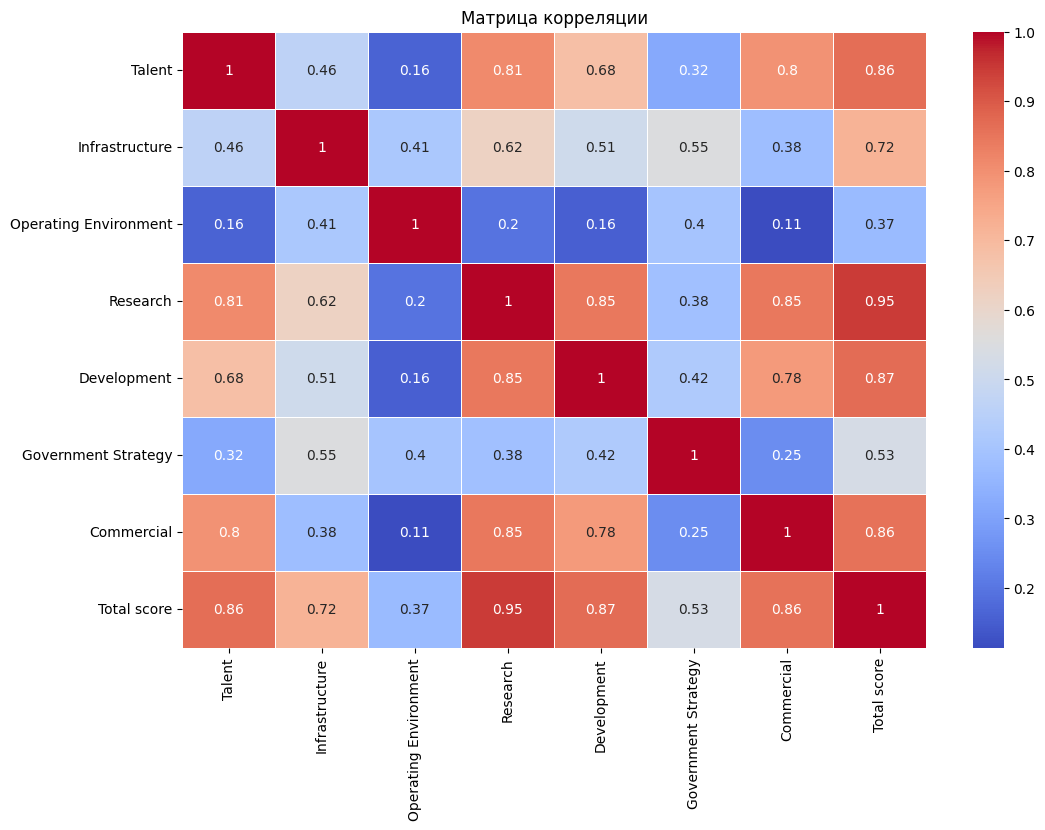

In [19]:
correlation_matrix = data[['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Матрица корреляции")
plt.show()

### Результаты: 
1. ***Высокая корреляция***:
* ***Research и Total score (0.95)***: Это ожидаемо, поскольку уровень исследований (Research) является ключевым фактором для общего успеха страны в области ИИ. Высокие значения этих показателей взаимосвязаны.
* ***Research и Development (0.85)***: Высокая корреляция между исследованиями и развитием предполагает, что страны с сильными исследовательскими программами часто демонстрируют значительные успехи и в развитии ИИ.
* ***Talent и Research (0.81)***: Наличие большого количества талантов также связано с высоким уровнем исследований. Это может свидетельствовать о том, что страны с развитыми образовательными и исследовательскими системами имеют большое количество специалистов в сфере ИИ.
* ***Talent и Commercial (0.80)***: Страны с высоким уровнем талантов часто имеют и более развитую коммерческую деятельность в области ИИ.
* ***Total score и Talent (0.86)***: Вклад "Talent" также сильно влияет на общий индекс ИИ страны, что логично.

2. ***Средняя корреляция***:
* ***Development и Government Strategy (0.42)***: Наличие государственных стратегий в ИИ в значительной степени влияет на развитие ИИ-технологий.
* ***Infrastructure и Research (0.62)***: Развитая инфраструктура поддерживает исследования, что показывает положительную связь между этими атрибутами.

3. ***Низкая корреляция***:
* ***Commercial и Operating Environment (0.11)***: Коммерческая деятельность в области ИИ не всегда зависит от операционной среды.
* ***Talent и Operating Environment (0.16)***: Слабая зависимость талантов от операционной среды может свидетельствовать о том, что талантливые специалисты могут работать в различных операционных условиях.

### 8. Построение графиков рассеивания


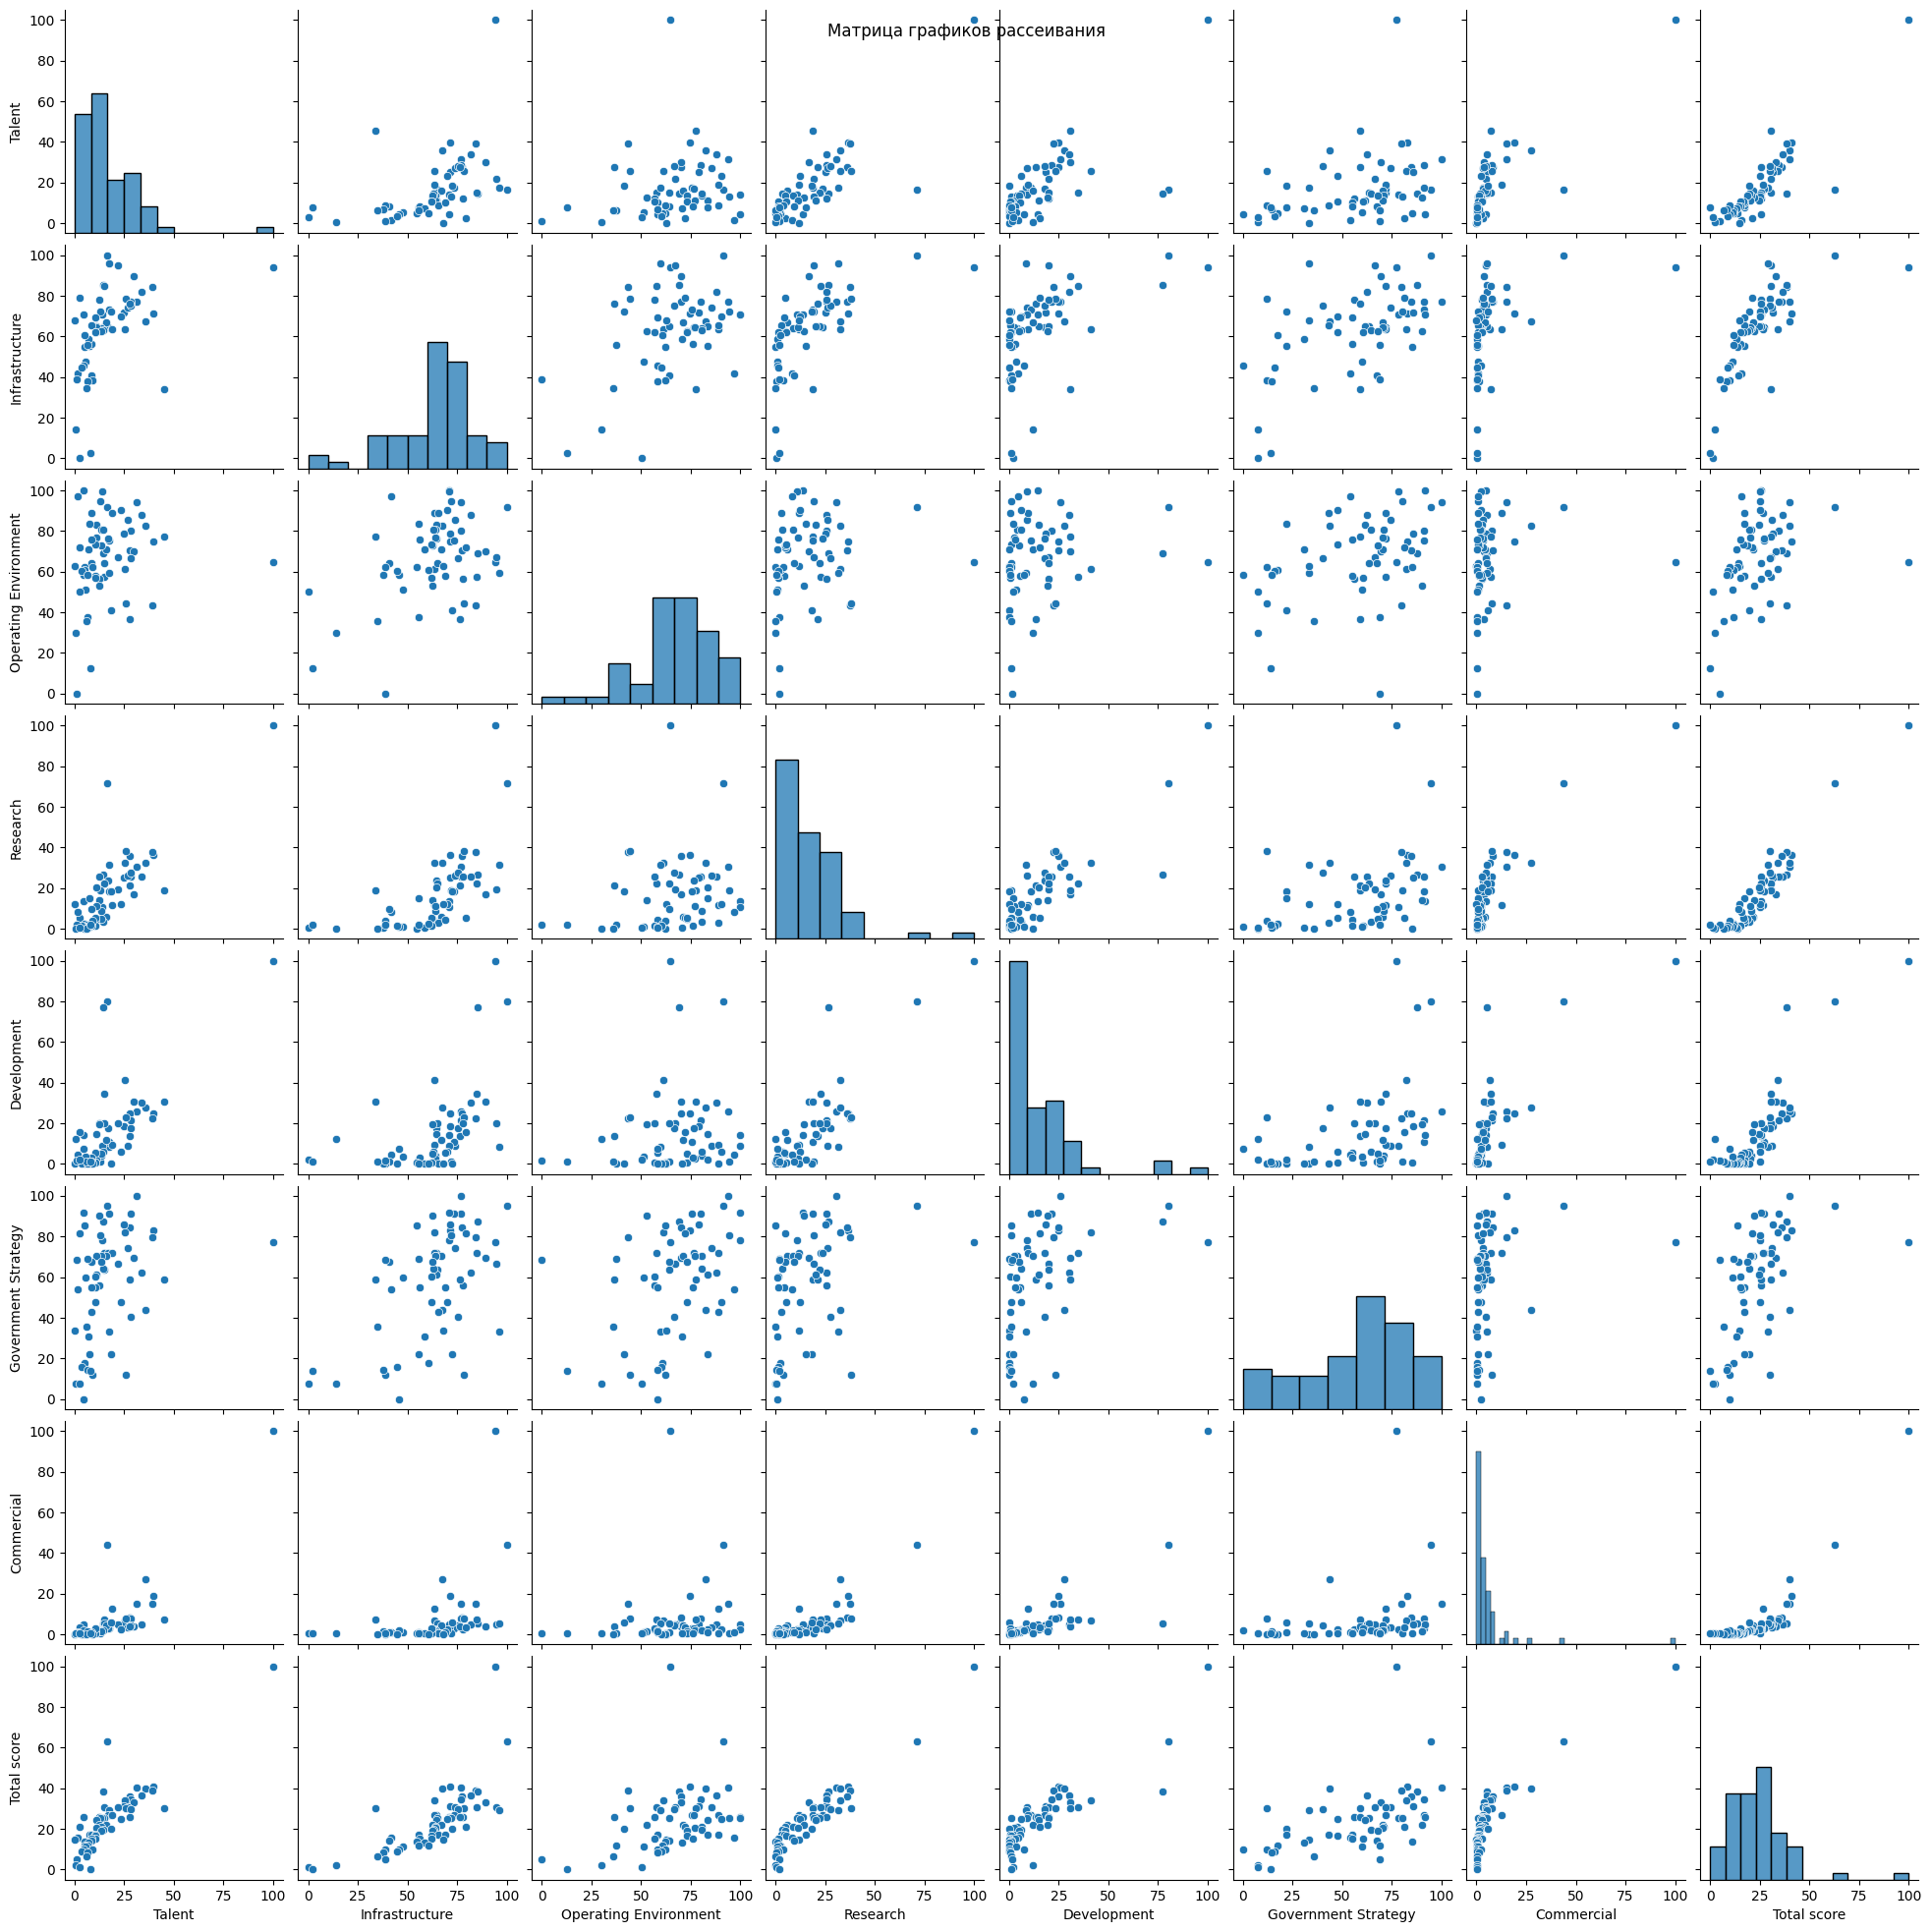

In [20]:
sns.pairplot(data[['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development', 'Government Strategy', 'Commercial', 'Total score']])
plt.suptitle('Матрица графиков рассеивания')
plt.show()